## Statistical and Machine Learning, Fall 2024

### Week 8: Mathematical Building Blocks of Neural Networks	

### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week8.ipynb)



### Overview 
<hr style="border:2px solid gray">

* So far, we have seen two linear models for regression and classification problems
    * Linear regression: $p(y|\mathbf{x},\mathbf{w})=\mathcal{N}(\mathbf{w}^T\mathbf{x}, \epsilon)$, where $\epsilon$ is a fixed variance for all inputs
    * Logistic regression: $p(y|\mathbf{x},\mathbf{w})=\text{Ber}(y|\sigma(\mathbf{w}^T\mathbf{x}))$, where $\sigma$ is the sigmoid or logistic function

* These models make the strong assumption that the input-output mapping is linear 
    * A better idea: we can equip the feature extractor with its own "trainable" parameters
    
    $$\mathbf{w}^T\phi(\mathbf{x};\boldsymbol{\theta})$$ 
    * Illustrative example in the next slide! 

### Example, part 1: feature extractor
<hr style="border:2px solid gray">

* Consider a classification problem with 3 input features $x_1,x_2,x_3$


<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/nn_example1.png?raw=true\" width=700>

### Example, part 2: classifier
<hr style="border:2px solid gray">

* This is the key idea behind multilayer perceptron (MLP) for "structured" or "tabular" data $\mathbf{x}\in\mathbb{R}^D$


<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/nn_example3.png?raw=true\" width=600>

### Feedforward networks
<hr style="border:2px solid gray">

* The information ﬂows through the function being evaluated from $\mathbf{x}$, through the intermediate computations, and ﬁnally to the output

* For example, we might have  $f^{(1)}, f^{(2)}, f^{(3)}$ connected in a chain to form

$$f(\mathbf{x})=f^{(3)}\Big(f^{(2)}\big(f^{(1)}(\mathbf{x})\big)\Big)$$

* $f^{(1)}$: the first layer,  $f^{(2)}$: the second layer of the network 
    * Because the training data does not show the desired output for  these layers, they are called **hidden layers**


* The overall length of the chain gives the **depth**, and the dimensionality of hidden layers determines the **width** of the model

### Classical example: The XOR problem
<hr style="border:2px solid gray">

* Learn a function that computes the exclusive OR of its two binary outputs (4 data points in $\mathbb{R}^2$) 
    * First activation function: $g(z)=\text{ReLU}(z)=\max\{0,z\}$ and no activation function for the last layer
    
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/xor_part1.png?raw=true\" width=600>

### Classical example: The XOR problem
<hr style="border:2px solid gray">

* This network correctly predicts all four class labels

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/xor_part2.png?raw=true\" width=600>

### Why nonlinear activation functions? 
<hr style="border:2px solid gray">

* If we just use a linear activation function, then the whole model reduces to a regular linear model

$$f(\mathbf{x})=\mathbf{W}^{(L)}\ldots\mathbf{W}^{(2)}\mathbf{W}^{(1)}\mathbf{x}=\mathbf{W}\mathbf{x}$$

* Therefore, it is important to use nonlinear activation functions
    * Sigmoid (logistic) function: $\sigma(a)=\frac{1}{1+\exp(-a)}$
    * rectified linear unit or ReLU: $\text{ReLU}(a)=\max\{0, a\}$
    * ...

### A tour of activation functions
<hr style="border:2px solid gray">

* ReLU (Rectified Linear Unit)
    * ReLU is known for its simplicity and has been widely used in deep learning due to its ability to introduce non-linearity into the network
    
    $$\text{ReLU}(x)=\max\{0, x\}$$
    
* ELU (Exponential Linear Unit)
    * ELU addresses the "dying ReLU" problem by allowing negative values, which helps to keep gradients flowing during training
    * $\alpha$ is a hyperparameter that controls the output of the function for negative values of $x$
    
    $$\text{ELU}(x)=\begin{cases}x & \text{if } x \geq 0 \\
\alpha \cdot \big(\exp(x) - 1\big) & \text{if } x < 0
\end{cases}$$

* Softplus
    * Softplus is a smooth approximation of the ReLU function
    * It has the advantage of being differentiable everywhere, which makes it suitable for gradient-based optimization algorithms
    
    $$\text{Softplus}(x)=\log\big(1+\exp(x)\big)$$


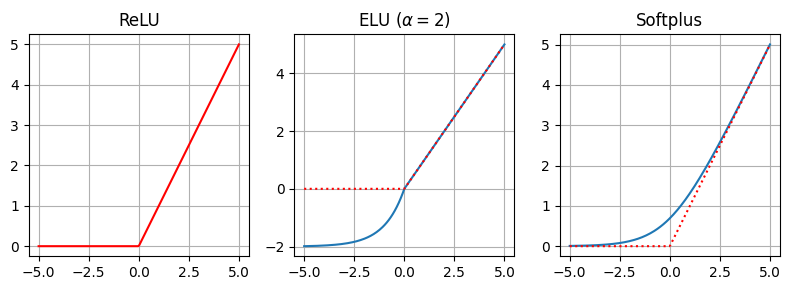

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of x values
x = np.linspace(-5, 5, 200)  # Adjust the range as needed

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the ELU function
def elu(x, alpha=2.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Define the Softplus function
def softplus(x):
    return np.log(1 + np.exp(x))


# Plot the activation functions
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.title("ReLU")
plt.plot(x, relu(x), 'r-')
plt.grid()

plt.subplot(1, 3, 2)
plt.title(r"ELU ($\alpha=2$)")
plt.plot(x, elu(x))
plt.plot(x, relu(x), 'r:')
plt.grid()

plt.subplot(1, 3, 3)
plt.title("Softplus")
plt.plot(x, softplus(x))
plt.plot(x, relu(x), 'r:')
plt.grid()

plt.tight_layout()
plt.show()